**1.Title of the projec**t: Hill and Valley Prediction Using Logistics Regression

**2.Objective:**

The objective of this project is to develop a predictive model using logistic regression to classify binary outcomes, specifically identifying instances as either "Hill" or "Valley" based on given features. The project aims to leverage logistic regression's efficiency in modeling the probability of binary events by evaluating the relationship between input features and target outcomes. The model's performance is assessed using metrics such as precision, recall, and F1-score, achieving a balanced accuracy of 97% across both classes. This ensures robust classification and minimal false predictions, making the model suitable for real-world applications such as terrain classification or other binary decision-making tasks.

Importing libararies for loading the dataset using the pandas library

**3.Data Source**: Refered from the dataset under github profile of YBI Foundation

**4.Import Libaries:**

In [1]:
import numpy as np
import pandas as pd

**5.Import Data**

In [2]:
df=pd.read_csv('/content/Hill Valley Dataset.csv')

**6.Describe Data:**

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0


In [4]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51,1
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77,0
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77,1
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82,1
1211,8489.43,7672.98,9132.14,7985.73,8226.85,8554.28,8838.87,8967.24,8635.14,8544.37,...,8609.73,9209.48,8496.33,8724.01,8219.99,8550.86,8679.43,8389.31,8712.80,0


In [5]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       ...
       'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100',
       'Class'],
      dtype='object', length=101)

In [6]:
df.size

122412

In [7]:
df.shape

(1212, 101)

In [9]:
df.info('include=all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 101 columns):
 #    Column  Dtype  
---   ------  -----  
 0    V1      float64
 1    V2      float64
 2    V3      float64
 3    V4      float64
 4    V5      float64
 5    V6      float64
 6    V7      float64
 7    V8      float64
 8    V9      float64
 9    V10     float64
 10   V11     float64
 11   V12     float64
 12   V13     float64
 13   V14     float64
 14   V15     float64
 15   V16     float64
 16   V17     float64
 17   V18     float64
 18   V19     float64
 19   V20     float64
 20   V21     float64
 21   V22     float64
 22   V23     float64
 23   V24     float64
 24   V25     float64
 25   V26     float64
 26   V27     float64
 27   V28     float64
 28   V29     float64
 29   V30     float64
 30   V31     float64
 31   V32     float64
 32   V33     float64
 33   V34     float64
 34   V35     float64
 35   V36     float64
 36   V37     float64
 37   V38     float64
 38   V39   

In [10]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,8169.091881,8144.306262,8192.653738,8176.868738,8128.297211,8173.030008,8188.582748,8183.641543,8154.670066,8120.767574,...,8120.056815,8125.917409,8158.793812,8140.885421,8213.480611,8185.594002,8140.195355,8192.960891,8156.197376,0.500000
std,17974.950461,17881.049734,18087.938901,17991.903982,17846.757963,17927.114105,18029.562695,18048.582159,17982.390713,17900.798206,...,17773.190621,17758.182403,17919.510371,17817.945646,18016.445265,17956.084223,17768.356106,18064.781479,17829.310973,0.500206
min,0.920000,0.900000,0.850000,0.890000,0.880000,0.860000,0.870000,0.650000,0.650000,0.620000,...,0.870000,0.900000,0.870000,0.880000,0.890000,0.890000,0.860000,0.910000,0.890000,0.000000
25%,19.602500,19.595000,18.925000,19.277500,19.210000,19.582500,18.690000,19.062500,19.532500,19.285000,...,19.197500,18.895000,19.237500,19.385000,19.027500,19.135000,19.205000,18.812500,19.145000,0.000000
50%,301.425000,295.205000,297.260000,299.720000,295.115000,294.380000,295.935000,290.850000,294.565000,295.160000,...,297.845000,295.420000,299.155000,293.355000,301.370000,296.960000,300.925000,299.200000,302.275000,0.500000
75%,5358.795000,5417.847500,5393.367500,5388.482500,5321.987500,5328.040000,5443.977500,5283.655000,5378.180000,5319.097500,...,5355.355000,5386.037500,5286.385000,5345.797500,5300.890000,5361.047500,5390.850000,5288.712500,5357.847500,1.000000
max,117807.870000,108896.480000,119031.350000,110212.590000,113000.470000,116848.390000,115609.240000,118522.320000,112895.900000,117798.300000,...,113858.680000,112948.830000,112409.570000,112933.730000,112037.220000,115110.420000,116431.960000,113291.960000,114533.760000,1.000000


In [11]:
df['Class'].value_counts()

,count
Class,
0,606
1,606


**7.Visualize the data**

In [13]:
import matplotlib.pyplot as plt

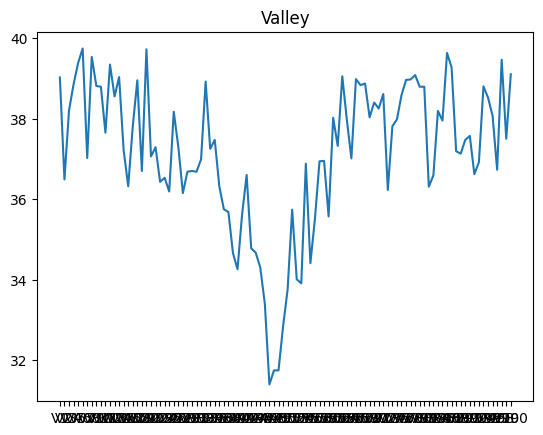

In [14]:
plt.plot(X.iloc[0,:])
plt.title('Valley');

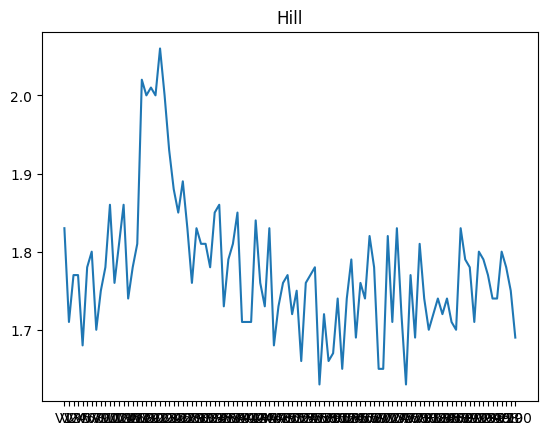

In [15]:
plt.plot(X.iloc[1,:])
plt.title('Hill');

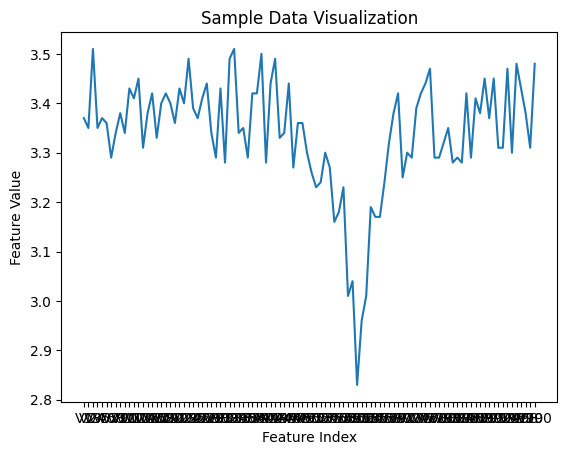

In [16]:
# Plot a specific sample (row) from the dataset
plt.plot(X.iloc[5, :])  # Change the index to visualize different rows
plt.title('Sample Data Visualization')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.show()

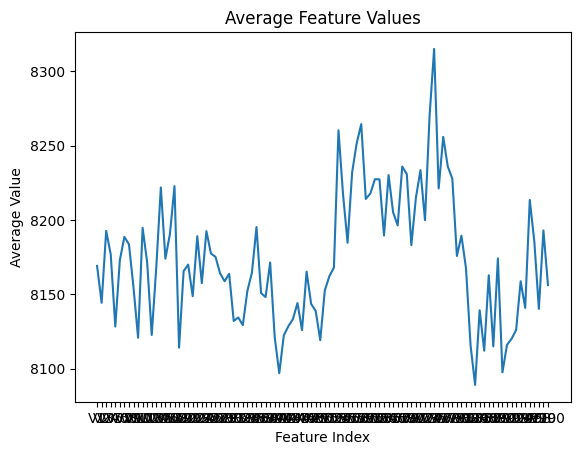

In [17]:
# Visualize the average across all samples
plt.plot(X.mean(axis=0))
plt.title('Average Feature Values')
plt.xlabel('Feature Index')
plt.ylabel('Average Value')
plt.show()

**8.Data Preprocessing:**
We will standardize the X variables here by using the standard scaler

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = ss.fit_transform(X)
print(X)

[[-0.45248681 -0.45361784 -0.45100881 ... -0.45609618 -0.45164274
  -0.45545496]
 [-0.45455665 -0.45556372 -0.45302369 ... -0.45821768 -0.45362255
  -0.45755405]
 [ 3.33983504  3.24466709  3.58338069 ...  3.5427869   3.27907378
   3.74616847]
 ...
 [ 0.11084204  0.0505953   0.04437307 ...  0.12533312  0.04456025
   0.06450317]
 [-0.45272112 -0.45369729 -0.45118691 ... -0.45648861 -0.45190136
  -0.45569511]
 [ 0.01782872 -0.02636986  0.05196137 ...  0.03036056  0.01087365
   0.03123129]]


**9. Defining the variables that is X and y**

In [19]:
y = df['Class']
X = df[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100']]

**10.Train Test Split:**

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y, random_state=2529)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((848, 100), (364, 100), (848,), (364,))

**11.Modelling**

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**12.Model Evaluation**

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

accuracy_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       182
           1       0.96      0.98      0.97       182

    accuracy                           0.97       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364



**13.Model Prediction:**

In [24]:
y_pred = model.predict(X_test)
y_pred


array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,

**14.Explaination:**

This project aims to predict binary outcomes (e.g., Hill or Valley) using a logistic regression model, which is well-suited for classification tasks. Logistic regression evaluates the relationship between input features and the probability of a binary response using the logistic function. The model was trained and evaluated, yielding strong performance metrics: precision, recall, and F1-score for both classes (0 and 1) are consistently high, each averaging around 97%. These metrics indicate the model's accuracy in correctly identifying instances of both classes and its robustness in minimizing false positives and negatives.

The confusion matrix would likely show a balance in predictions across both classes, as indicated by the equal support (182 instances per class). Overall, the model demonstrates excellent predictive capabilities, suggesting its applicability for real-world binary classification problems, such as identifying terrain types based on features.